# Generating FoGSM data

In [1]:
from fogsm import FoGSMModel, VariationalEncoder, VariationalDecoder, FoGSMVAE
from _imports import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Set the random seed for reproducibility
torch.manual_seed(0)

# Example usage
length_scale_feature = 0.5
length_scale_amplitude = 1.2
kappa = 1.0
grid_size = 10
frequency = 0.9
sigma = 0.1

thetas = torch.linspace(0, 2 * np.pi, 8)  # 8 orientations from 0 to 2*pi

# Creating an instance of the model
model = FoGSMModel(thetas,length_scale_feature, length_scale_amplitude, kappa, jitter = 1e-4,grid_size=grid_size, frequency=frequency, sigma=sigma)

/Users/khushu/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1695391836761/work/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Users/khushu/Desktop/IIB_Project FoGSM 2dSSN/GSM/fogsm.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta1 = torch.tensor(theta1)
/Users/khushu/Desktop/IIB_Project FoGSM 2dSSN/GSM/fogsm.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta2 = torch.tensor(theta2)


In [3]:
# Sample from the GP
combined_fields2, features = model.samples()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


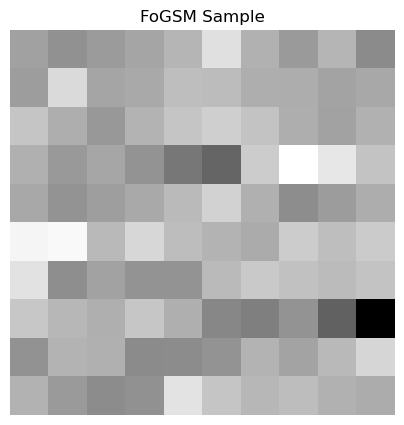

In [4]:
# Visualise the generated image
model.visualise(combined_fields2)

Generate or fetch $I$ (FoGSM-generated samples).
Pass $I$ through the encoder to get $\mathbf{g}$ and $\mathbf{A}$ distribution parameters.
Sample $\mathbf{g}$ and $\mathbf{A}$ using the reparameterisation trick.
Compute the ELBO loss, combining the reconstruction loss (using $\mathbf{g}$ and $\mathbf{A}$ samples) and the KL divergence terms.
Backpropagate the loss to update the encoder (and any other components involved in the loss computation).


Training:   0%|          | 0/10 [00:00<?, ?epoch/s]/Users/khushu/Desktop/IIB_Project FoGSM 2dSSN/GSM/fogsm.py:260: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  normalisation_constant = 0.5 * torch.log(2 * torch.pi * torch.tensor(sigma)**2) * torch.numel(original_I)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


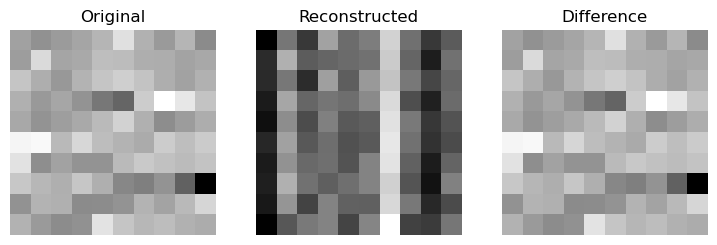

Training:  10%|█         | 1/10 [00:01<00:12,  1.37s/epoch]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/khushu/opt/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:251: UserWarning: Error detected in PowBackward0. No forward pass information available. Enable detect anomaly during forward pass for more information. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1695391836761/work/torch/csrc/autograd/python_anomaly_mode.cpp:97.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Training:  10%|█         | 1/10 [00:02<00:21,  2.40s/epoch]


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.DoubleTensor []] is at version 1; expected version 0 instead. Hint: the backtrace further above shows the operation that failed to compute its gradient. The variable in question was changed in there or anywhere later. Good luck!

In [5]:
I = combined_fields2
    
# Define the dimensionality
input_dim = I.shape[1]  
hidden_dims = [I.shape[1], I.shape[1]] 
output_dim = I.shape[1] 
g_dim = len(thetas)*grid_size**2
A_dim = 10
    
# Create the FoGSM VAE
fogsm_vae = FoGSMVAE(input_dim, hidden_dims, output_dim, g_dim, A_dim)
    
# Define the optimiser
optimiser = torch.optim.Adam(fogsm_vae.parameters(), lr=1e-2)
    
# Train the VAE
num_epochs = 10
elbo_values = fogsm_vae.train(num_epochs=num_epochs, I=I, optimiser=optimiser,print_every=1)

# Plot the ELBO values as a function of epoch
plt.plot(range(1, num_epochs + 1), elbo_values)
plt.xlabel('Epoch')
plt.ylabel('NELBO')
plt.title('NELBO as a Function of Epoch')
plt.grid(True)
plt.show()

# Save the trained model
torch.save(fogsm_vae.state_dict(), 'fogsm_vae.pt')

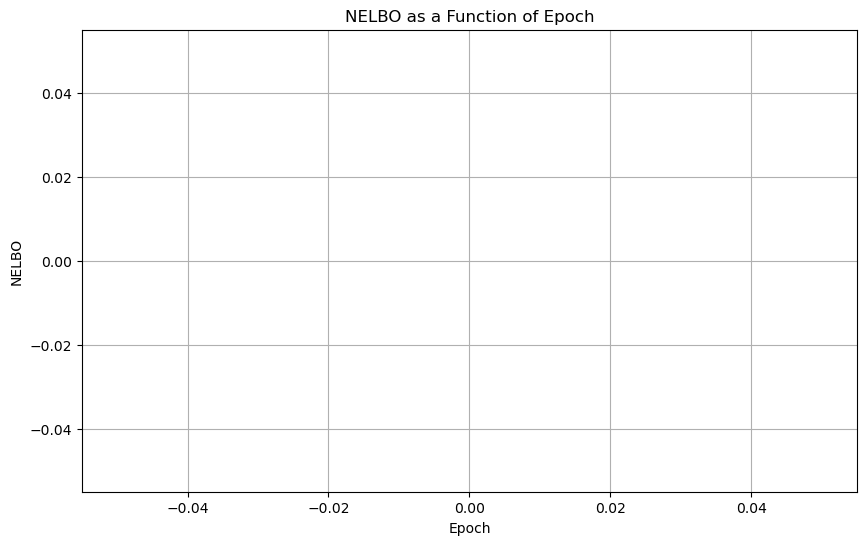

In [ ]:
# Plot the ELBO values as a function of epoch
plt.plot(range(1, num_epochs + 1), elbo_values)
plt.xlabel('Epoch')
plt.ylabel('NELBO')
plt.title('NELBO as a Function of Epoch')
plt.grid(True)
plt.show()

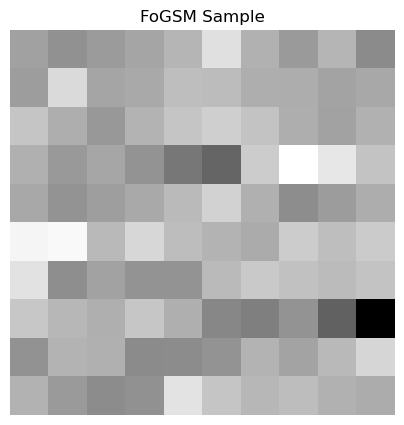

In [ ]:
model.visualise(combined_fields2)